In [ ]:
import tensorflow

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2,os
import matplotlib.pyplot as plt

data_path='/content/drive/MyDrive/Sign_Language_Detection/Dataset'
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels))

print(label_dict)
print(categories)
print(labels)

{'TRAIN': 0, 'TEST': 1}
['TRAIN', 'TEST']
[0, 1]


In [ ]:
data_path='/content/drive/MyDrive/Sign_Language_Detection/Dataset/TRAIN'
classes_path=os.listdir(data_path)
classesf=os.listdir(data_path)
print(classesf)
labels_classes=[i for i in range(len(classesf))]
print(labels_classes)

['G', 'V', 'N', 'Q', 'X', 'O', 'S', 'U', 'W', 'J', 'B', 'M', 'R', 'Y', 'E', '0', 'F', 'L', 'H', 'C', 'T', 'A', 'I', 'Z', 'K', 'D', 'P']
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]


In [ ]:
data_path='/content/drive/MyDrive/Sign_Language_Detection/Dataset'

In [ ]:
label_classes_dict=dict(zip(classesf,labels_classes))

In [ ]:
#print(labels_classes)
#print(categories)
print(label_classes_dict)

{'G': 0, 'V': 1, 'N': 2, 'Q': 3, 'X': 4, 'O': 5, 'S': 6, 'U': 7, 'W': 8, 'J': 9, 'B': 10, 'M': 11, 'R': 12, 'Y': 13, 'E': 14, '0': 15, 'F': 16, 'L': 17, 'H': 18, 'C': 19, 'T': 20, 'A': 21, 'I': 22, 'Z': 23, 'K': 24, 'D': 25, 'P': 26}


In [ ]:
import numpy as np

In [ ]:
img_size=128
data=[]
target=[]
c=0
minValue = 70
for category in categories:

    cat_path=os.path.join(data_path,category)
    print(cat_path)
    cat_names=os.listdir(cat_path)
    print(cat_names)
    for classes in cat_names:
        folder_path=os.path.join(data_path,category,classes)
        print(folder_path)
        img_names=os.listdir(folder_path)
        for img_name in img_names:
            img_path=os.path.join(folder_path,img_name)
            img=cv2.imread(img_path)

            try:
                gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
                blur = cv2.GaussianBlur(gray,(5,5),2)
                th3 = cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,11,2)
                ret, res = cv2.threshold(th3, minValue, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                resized=cv2.resize(res,(img_size,img_size))
                data.append(resized)
                target.append(label_classes_dict[classes])
            except Exception as e:
                print('Exception:',e)

/content/drive/MyDrive/Hackathon/Trident_Hacks/Sign_Language_Detection/Dataset/TRAIN
['G', 'V', 'N', 'Q', 'X', 'O', 'S', 'U', 'W', 'J', 'B', 'M', 'R', 'Y', 'E', '0', 'F', 'L', 'H', 'C', 'T', 'A', 'I', 'Z', 'K', 'D', 'P']
/content/drive/MyDrive/Hackathon/Trident_Hacks/Sign_Language_Detection/Dataset/TRAIN/G
/content/drive/MyDrive/Hackathon/Trident_Hacks/Sign_Language_Detection/Dataset/TRAIN/V
/content/drive/MyDrive/Hackathon/Trident_Hacks/Sign_Language_Detection/Dataset/TRAIN/N
/content/drive/MyDrive/Hackathon/Trident_Hacks/Sign_Language_Detection/Dataset/TRAIN/Q
/content/drive/MyDrive/Hackathon/Trident_Hacks/Sign_Language_Detection/Dataset/TRAIN/X
/content/drive/MyDrive/Hackathon/Trident_Hacks/Sign_Language_Detection/Dataset/TRAIN/O
/content/drive/MyDrive/Hackathon/Trident_Hacks/Sign_Language_Detection/Dataset/TRAIN/S
/content/drive/MyDrive/Hackathon/Trident_Hacks/Sign_Language_Detection/Dataset/TRAIN/U
/content/drive/MyDrive/Hackathon/Trident_Hacks/Sign_Language_Detection/Dataset/TRAI

In [ ]:
datanp=np.array(data)

In [ ]:
datanp.shape

(12380, 128, 128)

In [ ]:
targetnp=np.array(target)

targetnp.shape

(12380,)

In [ ]:
import numpy as np

data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,1))
target=np.array(target)

from tensorflow.keras.utils import to_categorical

new_target=to_categorical(target)

In [ ]:
new_target.shape

(12380, 27)

In [ ]:
np.save('data_img',data)
np.save('target',new_target)

In [ ]:
data=np.load('data_img.npy')
target=np.load('target.npy')

In [ ]:
from sklearn.model_selection import train_test_split
train_data,test_data,train_target,test_target=train_test_split(data,new_target,test_size=0.2)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense , Dropout
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "1"
sz = 128
classifier = Sequential()
classifier.add(Convolution2D(32, (3, 3), input_shape=(sz, sz, 1), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Convolution2D(32, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Flatten())
classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dropout(0.40))
classifier.add(Dense(units=96, activation='relu'))
classifier.add(Dropout(0.40))
classifier.add(Dense(units=64, activation='relu'))
classifier.add(Dense(units=27, activation='softmax')) # softmax for more than 2

classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) # categorical_crossentropy for more than 2

classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 28800)             0         
                                                                 
 dense (Dense)               (None, 128)               3

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=classifier.fit(train_data,train_target,shuffle=True,epochs=5,callbacks=[checkpoint],validation_split=0.3)

Epoch 1/5
217/217 [==============================] - ETA: 0s - loss: 2.2392 - accuracy: 0.3171

217/217 [==============================] - 152s 694ms/step - loss: 2.2392 - accuracy: 0.3171 - val_loss: 0.7644 - val_accuracy: 0.7863
Epoch 2/5
217/217 [==============================] - ETA: 0s - loss: 0.8720 - accuracy: 0.7043

217/217 [==============================] - 150s 694ms/step - loss: 0.8720 - accuracy: 0.7043 - val_loss: 0.1940 - val_accuracy: 0.9593
Epoch 3/5
217/217 [==============================] - ETA: 0s - loss: 0.4984 - accuracy: 0.8306

217/217 [==============================] - 146s 675ms/step - loss: 0.4984 - accuracy: 0.8306 - val_loss: 0.0839 - val_accuracy: 0.9825
Epoch 4/5
217/217 [==============================] - ETA: 0s - loss: 0.3590 - accuracy: 0.8755

217/217 [==============================] - 150s 690ms/step - loss: 0.3590 - accuracy: 0.8755 - val_loss: 0.0352 - val_accuracy: 0.9946
Epoch 5/5
217/217 [==============================] - ETA: 0s - loss: 0.2883 - accuracy: 0.9054

217/217 [==============================] - 145s 669ms/step - loss: 0.2883 - accuracy: 0.9054 - val_loss: 0.0314 - val_accuracy: 0.9950


In [ ]:
print(classifier.evaluate(test_data,test_target))

78/78 [==============================] - 13s 164ms/step - loss: 0.0279 - accuracy: 0.9960
[0.027912229299545288, 0.9959612488746643]


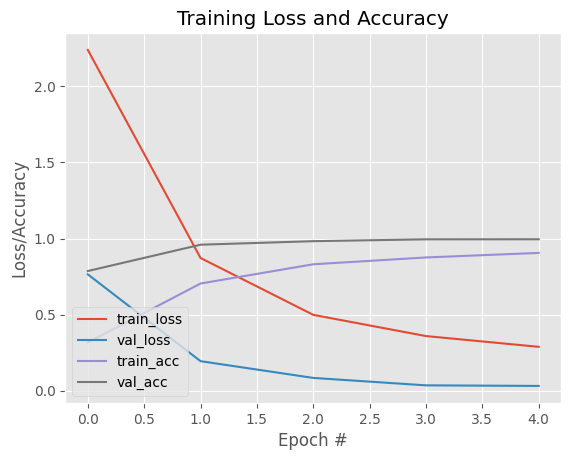

In [ ]:
N = 5
H=history
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig('evaluation.png')

In [ ]:
# serialize the model to disk
print("[INFO] saving mask detector model...")
classifier.save('asl_classifier.h5')
print("Done !")

[INFO] saving mask detector model...
Done !


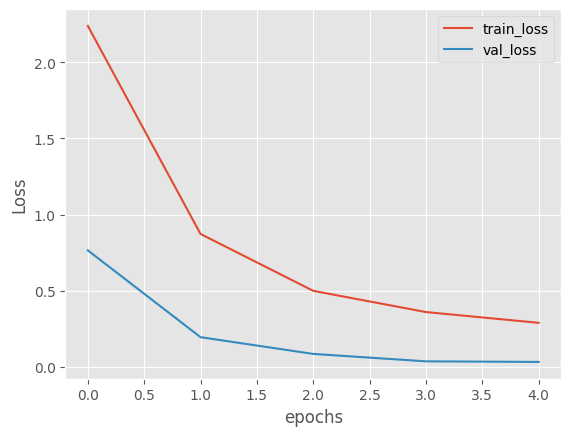

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.legend(['train_loss','val_loss'], loc=0)
plt.show()

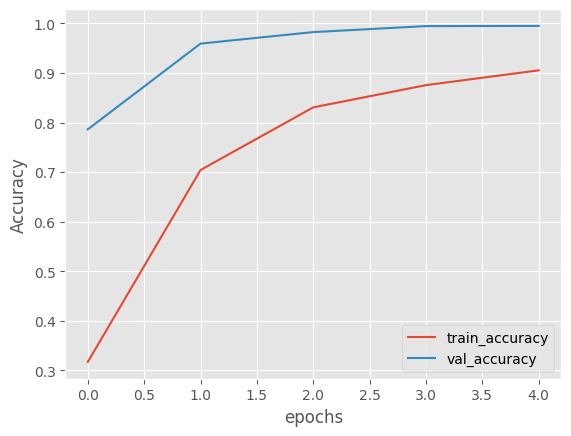

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.legend(['train_accuracy','val_accuracy'], loc=0)
plt.show()